In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
DATA_DIR = '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round1/'

list = ['prices_round_1_day_-1.csv','prices_round_1_day_-2.csv','prices_round_1_day_0.csv']

df1 = pd.read_csv(DATA_DIR + list[0], sep=';')
df2 = pd.read_csv(DATA_DIR + list[1], sep=';')
df3 = pd.read_csv(DATA_DIR + list[2], sep=';')

print(df1['bid_price_1'].min())
print(df2['bid_price_1'].min())
print(df3['ask_price_1'].min())

# df1['bid_price_1'].head(100).plot()

5017
4948
5028


In [59]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df
df = df3

# Individual dataframe analysis

In [60]:
def plot_individual(df1):
    a = df1[df1['product']=="AMETHYSTS"]
    a = a[['timestamp','mid_price']]
    a = a.set_index('timestamp')
    b = df1[df1['product']=="STARFRUIT"]
    b = b[['timestamp','mid_price']]
    b = b.set_index('timestamp')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(a)
    ax1.set_title('AMETHYSTS')
    ax2.plot(b)
    ax2.set_title('STARFRUIT')
    plt.show()


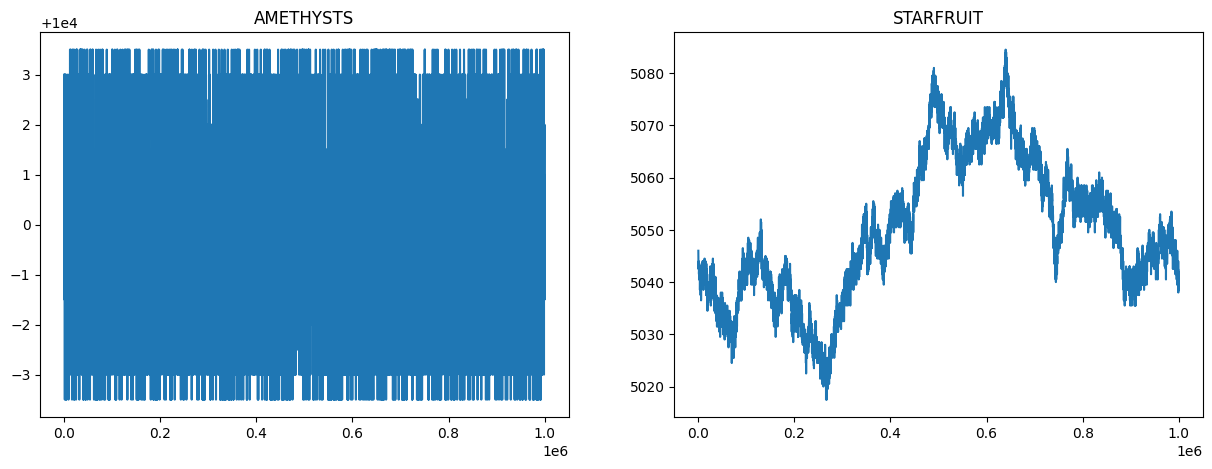

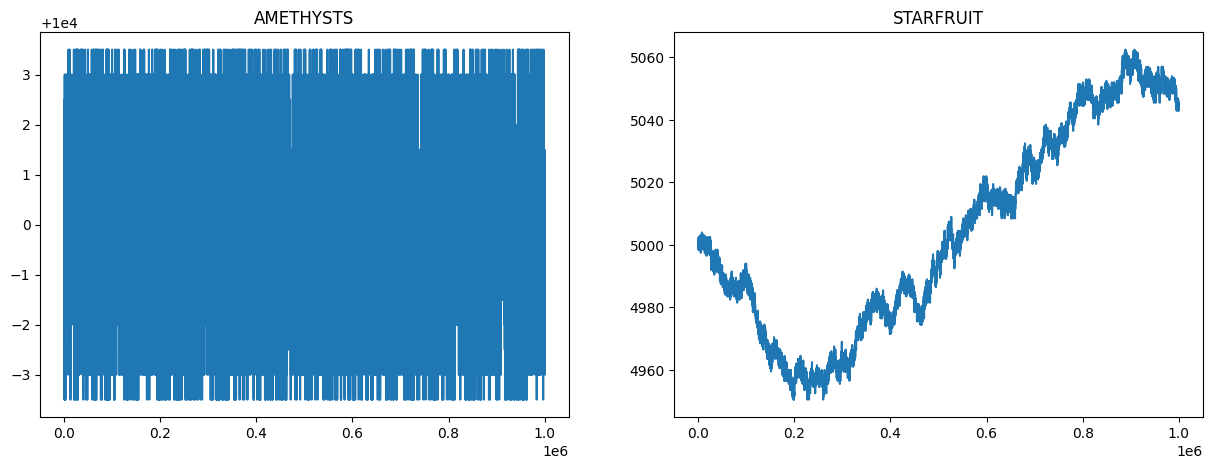

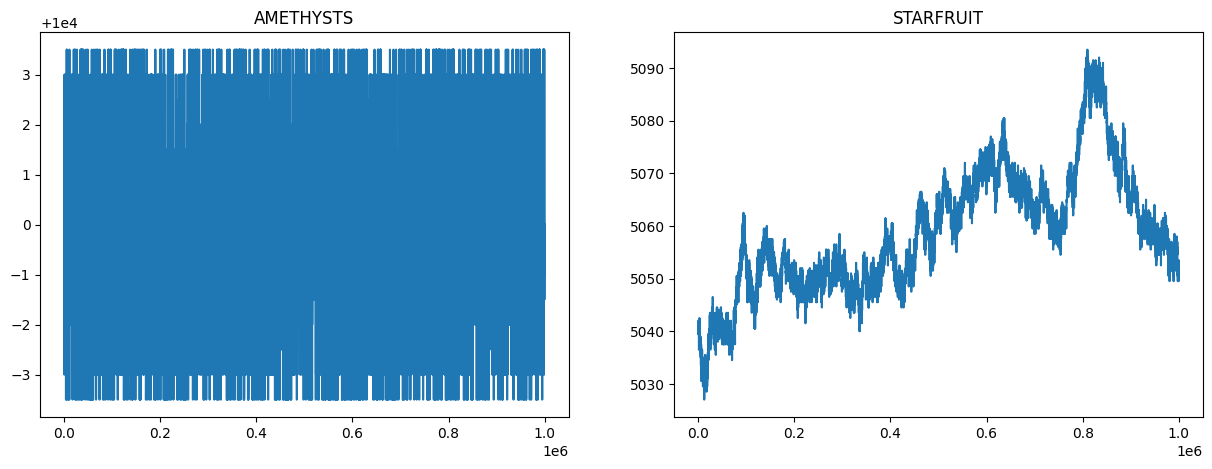

In [61]:
plot_individual(df1)
plot_individual(df2)
plot_individual(df3)

# Combined dataframe

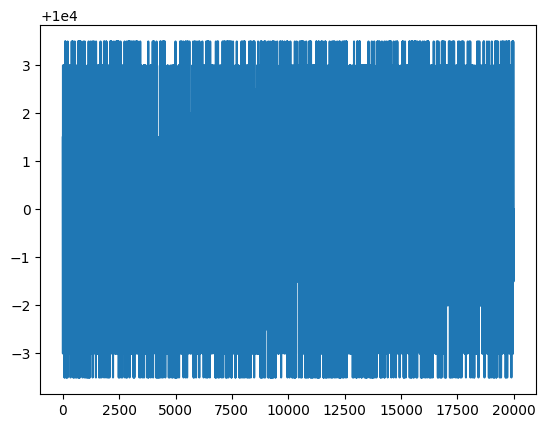

In [62]:
a = df[df['product']=="AMETHYSTS"]
a = a[['mid_price']]
a['residual'] = a['mid_price'] - 10000
b = df[df['product']=="STARFRUIT"]
b = b[['mid_price']]

plt.plot(a['mid_price'])
# plt.plot(b)
plt.show()

In [63]:
print("max",a['residual'].max())
print("min",a['residual'].min())

max 3.5
min -3.5


In [64]:
print("max",a['mid_price'].max())
print("min",a['mid_price'].min())

max 10003.5
min 9996.5


# STARFRUIT LINEAR REGRESSION

In [65]:
df = b

In [66]:
df['returns']=np.log(df.mid_price.pct_change()+1)
def lagit(df,lags):
    names = []
    for i in range(1,lags+1):
        df['Lag_'+str(i)] = df['returns'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [67]:
lagnames = lagit(df,4)
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4']

In [68]:
df.dropna(inplace=True)

In [69]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [70]:
starting_coefficients = [-0.01869561,  0.0455032 ,  0.16316049,  0.8090892]
starting_intercept = 4.481696494462085


In [71]:
model_with_starting_params = LinearRegression(fit_intercept=True)
model_with_starting_params.coef_ = np.array(starting_coefficients)
model_with_starting_params.intercept_ = starting_intercept

# Fit the model using the given starting parameters
model_with_starting_params.fit(df[lagnames], df['returns'])


LinearRegression()

In [73]:
df['prediction_LR'] = model_with_starting_params.predict(df[lagnames])

<Axes: >

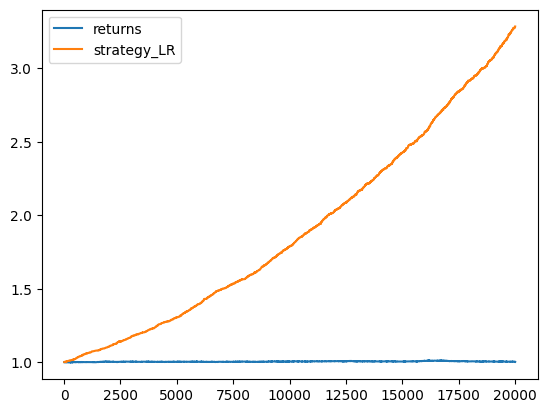

In [74]:
df['direction_LR'] = [1 if i > 0 else -1 for i in df['prediction_LR']]
df['strategy_LR'] = df['direction_LR']*df['returns']
np.exp(df[['returns','strategy_LR']].cumsum()).plot()


In [80]:
model = model_with_starting_params
print(model.coef_)
print(model.intercept_)

[-0.67657743 -0.437124   -0.27277644 -0.1224234 ]
5.460255106903702e-07


In [85]:
coefficients = model.coef_
intercept = model.intercept_

In [82]:
coefficients = [-0.01869561,  0.0455032 ,  0.16316049,  0.8090892]
intercept = 4.481696494462085

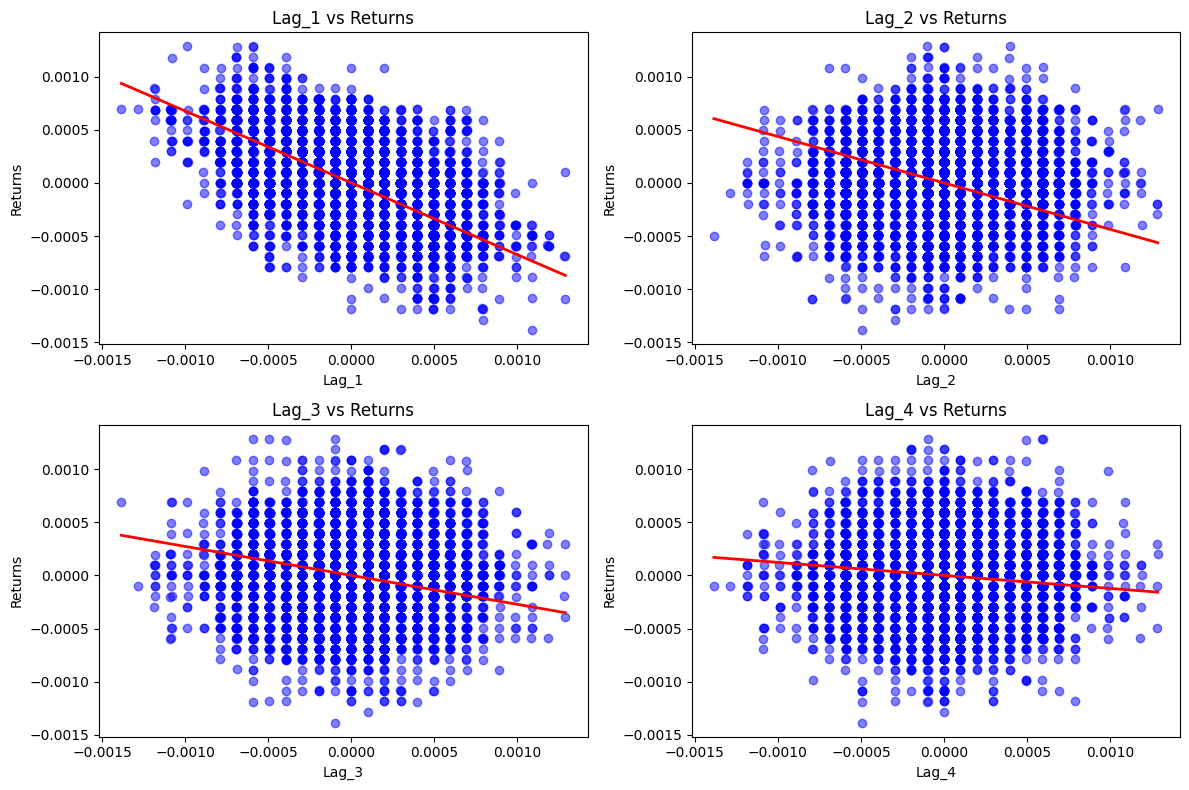

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(lagnames):
    axes[i].scatter(df[feature], df['returns'], color='blue', alpha=0.5)
    axes[i].set_title(f'{feature} vs Returns')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Returns')
    
    # Plot the linear regression line
    x_values = np.linspace(df[feature].min(), df[feature].max(), 100)
    y_values = intercept + coefficients[i] * x_values
    axes[i].plot(x_values, y_values, color='red', linewidth=2)

# Adjust layout
plt.tight_layout()
plt.show()
